<a href="https://colab.research.google.com/github/suhail1796/Customer-Segmentation/blob/main/Capstone_Project_4_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Step 1 : Data Cleaning and Preparation </b>

In [ ]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt
from prettytable import PrettyTable
from sklearn import preprocessing

# Importing Libraries for Visualization
import missingno as msno
import seaborn as sns
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import SilhouetteVisualizer

# Importing Algorithms
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [ ]:
# Loading data set
df = pd.read_excel('/content/drive/MyDrive/Copy of Online Retail.xlsx')

### <b>Understanding the Data Set </b>

In [ ]:
# Displaying top five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Displaying bottom five rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Checking shape of data set
df.shape

(541909, 8)

###Data set has total 541909 rows and 8 columns.

### <b>Dealing with Missing Values </b>

In [ ]:
# Checking null values in data set
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###The column 'CustomerID' and 'Description' both have missing values.

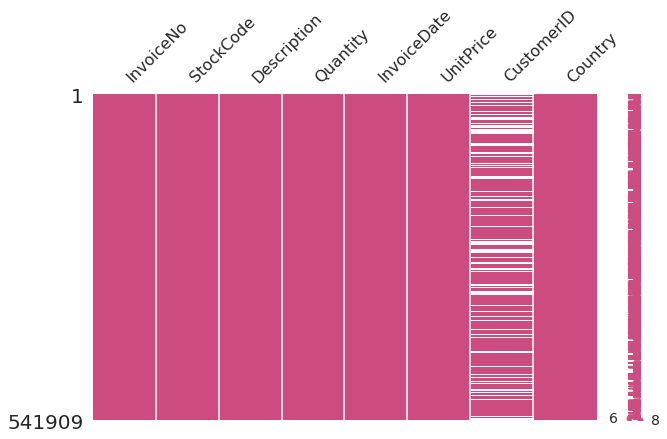

In [ ]:
# Visualizing the null values in columns
msno.matrix(df,color=(0.8, 0.3, 0.5),figsize=(10,6))

In [ ]:
# Dropping the null values
df.dropna(inplace=True)

In [ ]:
# Again checking the null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###Now we have removed all the null values.

In [ ]:
# Again checking the shape of data set
df.shape

(406829, 8)

###After removing null values total number of rows are 406829 and columns are 8.

### <b>Removing Duplicate Values </b>

In [ ]:
# Removing the duplicate values from data set
df.drop_duplicates(inplace=True)

In [ ]:
# Checking the shape of data set after removing duplicate values
df.shape

(401604, 8)

###After removing duplicate value the number of rows are 401604 and the columns are 8.

### <b>Dealing with Outliers </b>

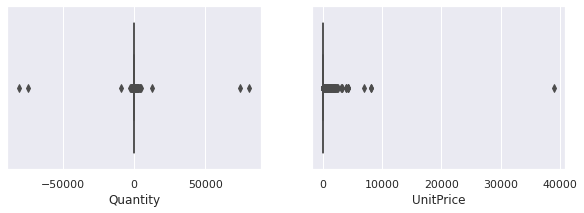

In [ ]:
# Plotting the boxplot for Outliers
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df['Quantity'])
plt.subplot(1,2,2)
sns.boxplot(df['UnitPrice'])

###We have two numerical features 'Quantity' and 'UnitPrice', so we will remove the outliers from these features.We will use IQR Method to remove the outliers from data set.

In [ ]:
# Lower and Upper Limit for Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower Limit for Quantity=",lower_limit)
print("Upper Limit for Quantity=",upper_limit)

Lower Limit for Quantity= -13.0
Upper Limit for Quantity= 27.0


In [ ]:
# Lower and Upper Limit for Unit Price
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower Limit for Unit Price=",lower_limit)
print("Upper Limit for Unit Price=",upper_limit)

Lower Limit for Unit Price= -2.5
Upper Limit for Unit Price= 7.5


In [ ]:
# Dropping Outliers
df.drop(df[(df.Quantity>27) | (df.Quantity<-13)].index,inplace=True)
df.drop(df[(df.UnitPrice>7.5) | (df.UnitPrice<-2.5)].index,inplace=True)

In [ ]:
# Checking the shape of data set after removing outliers
df.shape

(339453, 8)

###After removing Outliers number of rows are 339453 and columns are 8.

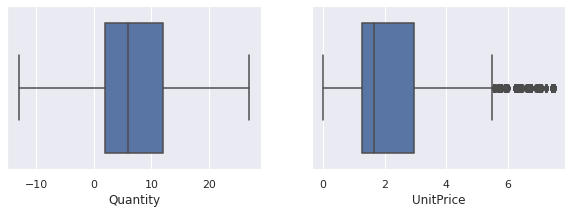

In [ ]:
# Plotting boxplot 
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df['Quantity'])
plt.subplot(1,2,2)
sns.boxplot(df['UnitPrice'])

## <b> Step 2 : Feature Engineering </b>

In [ ]:
# Copying data set
dfa = df.copy()

In [ ]:
# Converting "InvoiceDate" column into date time format
dfa["InvoiceDate"] = pd.to_datetime(dfa["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
# Adding features
dfa['Day']=dfa['InvoiceDate'].dt.day_name()
dfa['Month']=dfa['InvoiceDate'].dt.month_name()
dfa["year"] = dfa["InvoiceDate"].apply(lambda x: x.year)
dfa["month_num"] = dfa["InvoiceDate"].apply(lambda x: x.month)
dfa["day_num"] = dfa["InvoiceDate"].apply(lambda x: x.day)
dfa["hour"] = dfa["InvoiceDate"].apply(lambda x: x.hour)
dfa["minute"] = dfa["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# Adding sales amount 
dfa['sales'] = dfa['Quantity'].multiply(dfa['UnitPrice'])

###We have added the below mentioned columns in our data frame

*   ### 'Day'       - represents the name of day
*   ### 'Month'     - represents the month name
*   ### "year"      - represents the year 
*   ### "month_num" - shows the month number
*   ### "day_num"   - shows the day number
*   ### "hour"      - shows the time in hour
*   ### "minute"    - shows the time in minutes
*   ### "sales"     - represents total amount of sales

In [ ]:
# Displaying the top five rows
dfa.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,month_num,day_num,hour,minute,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34


## <b> Step 3 : Exploratory Data Analysis </b>

In [ ]:
# Copying data set
dfv = dfa.copy()

### <b>Top Ten Most Purchased Products </b>

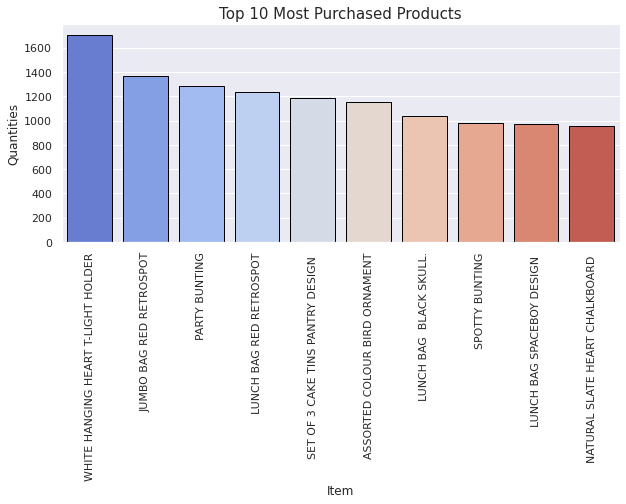

In [ ]:
# Top ten most purchased products from the website
top_purchase = dfv.groupby('Description')['sales'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values,palette='coolwarm',edgecolor='black')
plt.xticks(rotation=90)
plt.title("Top 10 Most Purchased Products", size=15)
plt.xlabel("Item")
plt.ylabel("Quantities")
plt.show()

### <b>Top Ten Lowest Sold Products </b>

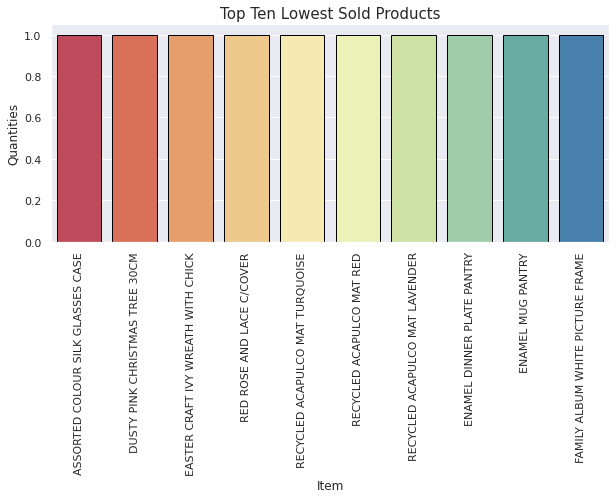

In [ ]:
# Lowest Sold Products
bot_purchase = dfv.groupby('Description')['sales'].count().sort_values(ascending=False)[-10:]
plt.figure(figsize=(10,4))
sns.barplot(x=bot_purchase.index, y=bot_purchase.values,palette='Spectral',edgecolor='black')
plt.xticks(rotation=90)
plt.title("Top Ten Lowest Sold Products", size=15)
plt.xlabel("Item")
plt.ylabel("Quantities")
plt.show()

### <b>Top Ten Cancelled/Returned Items </b>

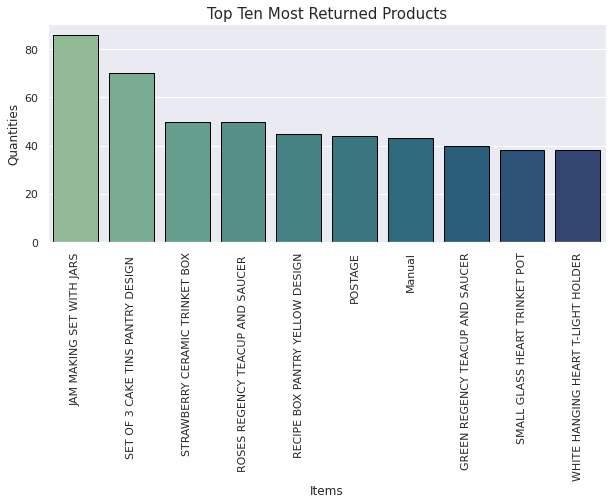

In [ ]:
# Filter for most frequently returned items
refunds = dfv[dfv['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(10,4))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'],palette='crest',edgecolor='black')
plt.title("Top Ten Most Returned Products", size=15)
plt.xticks(rotation=90)
plt.xlabel("Items")
plt.ylabel("Quantities")
plt.show()

### <b>Summary of Product Sales </b>

In [ ]:
# Specifying the Column Names while initializing the Table 
prod_sum = PrettyTable(['SL No.',"Top 10 Most Purchased Products","Top 10 Lowest Sold Products","Top 10 Most Returned Products"]) 
  
# Adding rows 
prod_sum.add_row(['1',"WHITE HANGING HEART T-LIGHT HOLDER", "ASSORTED COLOUR SILK GLASSES CASE", "JAM MAKING SET WITH JARS"]) 
prod_sum.add_row(['2',"JUMBO BAG RED RETROSPOT ","DUSTY PINK CHRISTMAS TREE 30CM ", "SET OF 3 CAKE TINS PANTRY DESIGN"])
prod_sum.add_row(['3',"PARTY BUNTING ", "EASTER CRAFT IVY WREATH WITH CHICK", "STRAWBERRY CERAMIC TRINKET BOX"]) 
prod_sum.add_row(['4',"LUNCH BAG RED RETROSPOT", "RED ROSE AND LACE C/COVER ", "ROSES REGENCY TEACUP AND SAUCER "])
prod_sum.add_row(['5',"SET OF 3 CAKE TINS PANTRY DESIGN", "RECYCLED ACAPULCO MAT TURQUOISE", "RECIPE BOX PANTRY YELLOW DESIGN"]) 
prod_sum.add_row(['6',"ASSORTED COLOUR BIRD ORNAMENT","RECYCLED ACAPULCO MAT RED", "POSTAGE"])
prod_sum.add_row(['7',"LUNCH BAG  BLACK SKULL ", "RECYCLED ACAPULCO MAT LAVENDER", "Manual"]) 
prod_sum.add_row(['8',"SPOTTY BUNTING", "ENAMEL DINNER PLATE PANTRY", "GREEN REGENCY TEACUP AND SAUCER"])
prod_sum.add_row(['9',"LUNCH BAG SPACEBOY DESIGN", "ENAMEL MUG PANTRY", "SMALL GLASS HEART TRINKET POT"]) 
prod_sum.add_row(['10',"NATURAL SLATE HEART CHALKBOARD ", "FAMILY ALBUM WHITE PICTURE FRAME", "WHITE HANGING HEART T-LIGHT HOLDER"])
print(prod_sum) 

+--------+------------------------------------+------------------------------------+------------------------------------+
| SL No. |   Top 10 Most Purchased Products   |    Top 10 Lowest Sold Products     |   Top 10 Most Returned Products    |
+--------+------------------------------------+------------------------------------+------------------------------------+
|   1    | WHITE HANGING HEART T-LIGHT HOLDER | ASSORTED COLOUR SILK GLASSES CASE  |      JAM MAKING SET WITH JARS      |
|   2    |      JUMBO BAG RED RETROSPOT       |  DUSTY PINK CHRISTMAS TREE 30CM    |  SET OF 3 CAKE TINS PANTRY DESIGN  |
|   3    |           PARTY BUNTING            | EASTER CRAFT IVY WREATH WITH CHICK |   STRAWBERRY CERAMIC TRINKET BOX   |
|   4    |      LUNCH BAG RED RETROSPOT       |     RED ROSE AND LACE C/COVER      |  ROSES REGENCY TEACUP AND SAUCER   |
|   5    |  SET OF 3 CAKE TINS PANTRY DESIGN  |  RECYCLED ACAPULCO MAT TURQUOISE   |  RECIPE BOX PANTRY YELLOW DESIGN   |
|   6    |   ASSORTED CO

### <b>Top Five Countries in Sales </b>

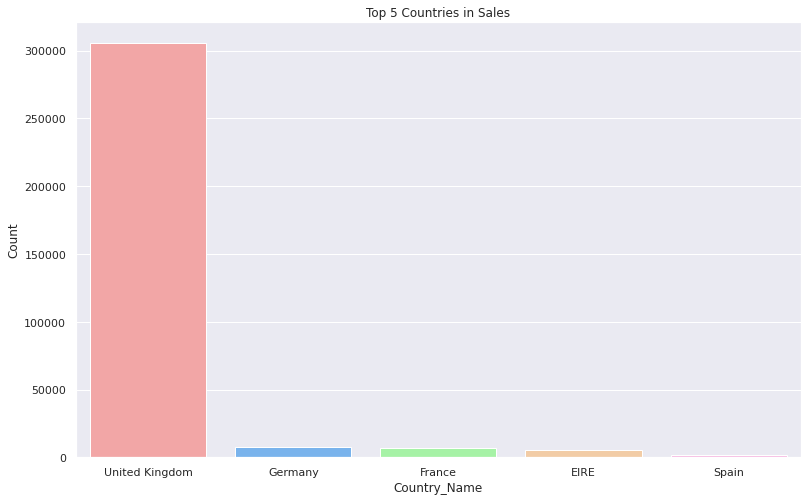

In [ ]:
# Plotting top five countries in sales
country_df=dfv['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
pal = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6']
plt.title('Top 5 Countries in Sales')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5],palette=pal)

### <b>Top Five Countries in Lowest Sales </b>

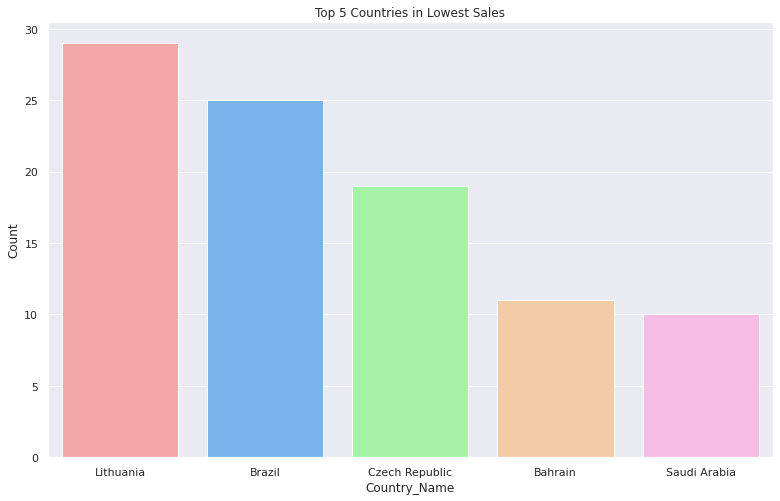

In [ ]:
# Plotting bottom five countries in sales
country_df=dfv['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
pal = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6']
plt.title('Top 5 Countries in Lowest Sales')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:],palette=pal)

### <b>Summary of Country Wise Sales </b>

In [ ]:
# Specifying the Column Names while initializing the Table 
country_sum = PrettyTable(['SL No.',"TOP FIVE COUNTRIES IN SALES","BOTTOM FIVE COUNTRIES IN SALES"]) 
  
# Adding rows 
country_sum.add_row(['1',"United Kingdom", "Saudi Arabia"]) 
country_sum.add_row(['2',"Germany", "Bahrain"])
country_sum.add_row(['3',"France", "Czech Republic"]) 
country_sum.add_row(['4',"Ireland", "Brazil"])
country_sum.add_row(['5',"Spain", "Lithuania"])
print(country_sum) 

+--------+-----------------------------+--------------------------------+
| SL No. | TOP FIVE COUNTRIES IN SALES | BOTTOM FIVE COUNTRIES IN SALES |
+--------+-----------------------------+--------------------------------+
|   1    |        United Kingdom       |          Saudi Arabia          |
|   2    |           Germany           |            Bahrain             |
|   3    |            France           |         Czech Republic         |
|   4    |           Ireland           |             Brazil             |
|   5    |            Spain            |           Lithuania            |
+--------+-----------------------------+--------------------------------+


### <b>Sales Over the Day </b>

Text(0.5, 1.0, 'Sales Over the Day')

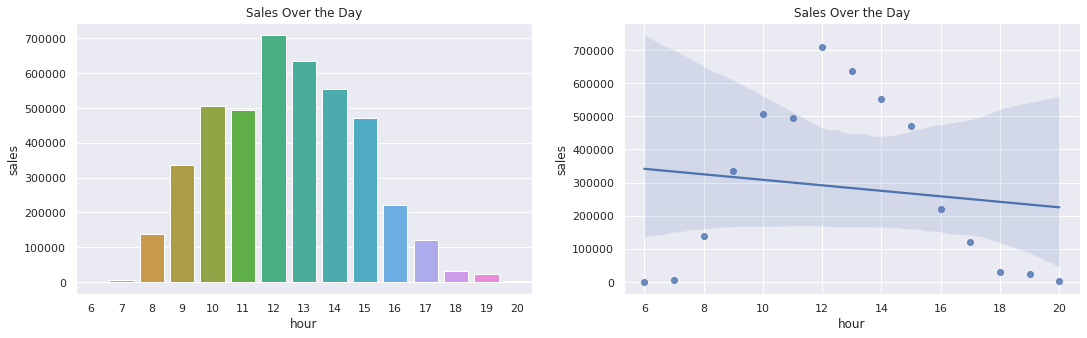

In [ ]:
# Plotting Sales Over the Day

plt.figure(figsize=(18,5))
aud = dfv[['hour','sales']].groupby('hour').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x = 'hour',y = 'sales', data = aud)
plt.title('Sales Over the Day')
plt.subplot(1,2,2)
sns.regplot(x = 'hour',y = 'sales', data = aud)
plt.title('Sales Over the Day')

###Most transactions are done between 10 am to 3 pm.

### <b>Sales Over the Week: </b>

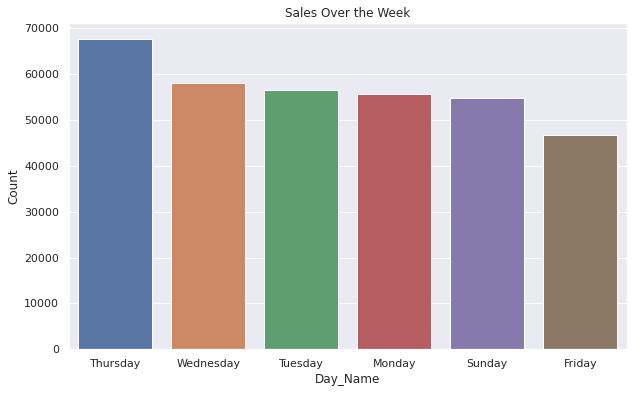

In [ ]:
# Sale of Store Over the Week
day_df=dfv['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
plt.figure(figsize=(10,6))
plt.title('Sales Over the Week')
sns.barplot(x='Day_Name',y='Count',data=day_df)

###Sales is increased gradually from Monday to Thurday and it is higher on Thursday.

### <b>Sales Over the Month </b>

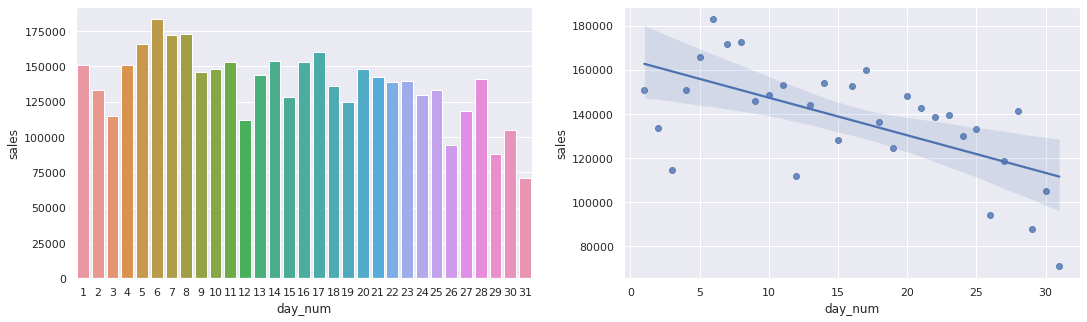

In [ ]:
# Sales Over the Month

plt.figure(figsize=(18,5))
auz1 = dfv[['day_num','sales']].groupby('day_num').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x = 'day_num',y = 'sales', data = auz1)

plt.subplot(1,2,2)
sns.regplot(x = 'day_num',y = 'sales', data = auz1)


###Sales is good in first half of the month and it is dropping on month end.

### <b>Sales Over the Year </b>

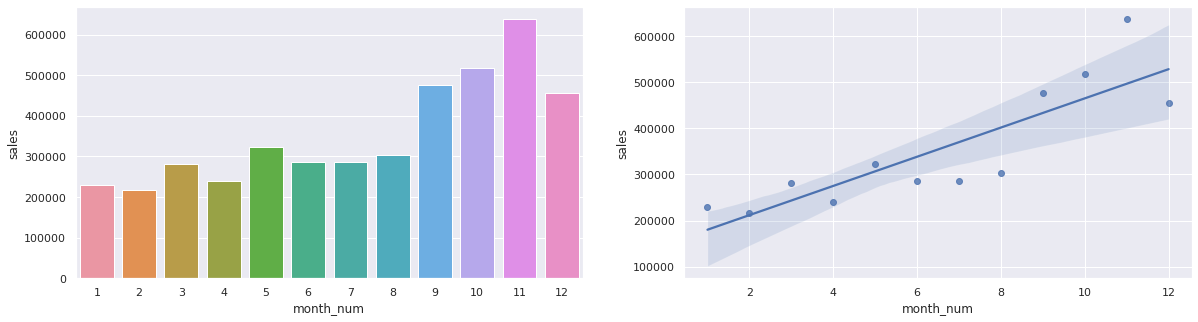

In [ ]:
# Sale over the year
plt.figure(figsize=(20,5))
auy = dfv[['month_num','sales']].groupby('month_num').sum().reset_index()

plt.subplot(1,2,1)
sns.barplot(x = 'month_num',y = 'sales', data = auy)

plt.subplot(1,2,2)
sns.regplot(x = 'month_num',y = 'sales', data = auy)


In [ ]:
# Dropping 0 and negative sales (returned items)
dfa.drop(dfa[(dfa.sales<0) | (dfa.sales==0)].index,inplace=True)

## <b> Step 4 : Creating RFM Model </b>

In [ ]:
''' Recency = Latest Date - Last Inovice Data, 
    Frequency = count of invoice no. of transaction(s), 
    Monetary = Sum of sales for each customer'''

# Setting Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Creating RFM Modelling scores for each customer
rfm_df = dfa.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'sales': lambda x: x.sum()})

# Converting Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'sales': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,166,3314.73
1,12348.0,248,6,90.20
2,12349.0,18,58,999.15
3,12350.0,310,16,294.40
4,12352.0,36,66,1130.94


Text(0.5, 1.0, 'Monetary Distribution')

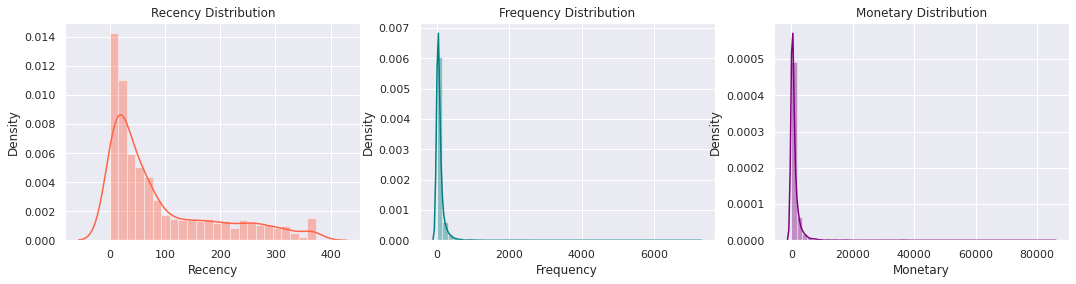

In [ ]:
# Recency, Frequency and Monetary Distribution

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.distplot(x=rfm_df.Recency,color ="tomato")
plt.ylabel('Density')
plt.xlabel('Recency')
plt.title('Recency Distribution')


plt.subplot(1,3,2)
sns.distplot(x=rfm_df.Frequency,color = "teal")
plt.ylabel('Density')
plt.xlabel('Frequency')
plt.title('Frequency Distribution')


plt.subplot(1,3,3)
sns.distplot(x=rfm_df.Monetary,color = "purple")
plt.ylabel('Density')
plt.xlabel('Monetary')
plt.title('Monetary Distribution')

In [ ]:
#Splitting RFM  into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 14.0, 0.5: 36.0, 0.75: 87.0},
 'Monetary': {0.25: 206.16000000000003, 0.5: 465.97, 0.75: 1127.3400000000001},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,166,3314.73,1,1,1
12348.0,248,6,90.20,4,4,4
12349.0,18,58,999.15,2,2,2
12350.0,310,16,294.40,4,3,3
12352.0,36,66,1130.94,2,2,1


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347.0,2,166,3314.73,1,1,1,111,3
12348.0,248,6,90.20,4,4,4,444,12
12349.0,18,58,999.15,2,2,2,222,6
12350.0,310,16,294.40,4,3,3,433,10
12352.0,36,66,1130.94,2,2,1,221,5


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Text(0.5, 1.0, 'Monetary Distribution')

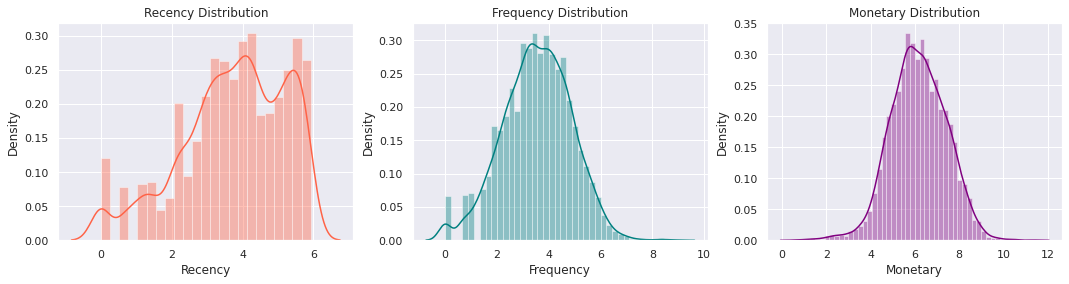

In [ ]:
# Recency, Frequency and Monetary Distribution

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.distplot(x=Log_Tfd_Data['Recency'],color ="tomato")
plt.ylabel('Density')
plt.xlabel('Recency')
plt.title('Recency Distribution')


plt.subplot(1,3,2)
sns.distplot(x=Log_Tfd_Data.query('Frequency < 1000')['Frequency'],color = "teal")
plt.ylabel('Density')
plt.xlabel('Frequency')
plt.title('Frequency Distribution')


plt.subplot(1,3,3)
sns.distplot(x=Log_Tfd_Data.query('Monetary < 10000')['Monetary'],color = "purple")
plt.ylabel('Density')
plt.xlabel('Monetary')
plt.title('Monetary Distribution')

In [ ]:
# Preprocessing RFM columns
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# Scaling the dataset
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

## <b> Step 5 : Finding Optimum Number of Clusters </b>

### **Elbow Method**

In order to find the optimum number of clusters for KMeans Clustering, we 
will use Elbow Method.We will plot elbow graph for 15 clusters. 



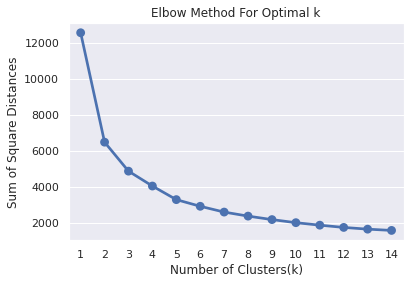

In [ ]:
# Plotting Elbow Graph
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The point before which the distortion or inertia is decresing in a Linear fashion is nothing but the optimal number of cluster.**Hence optimal number of clusters is 2.**

###**Silhouette Analysis**

In this method, we will plot the Silhouette Plot for range of clusters between 2 to 7. The plot represents the average silhouette score against the number of clusters.From this plot we can easily get the optimal number of clusters for KMeans Clustering.

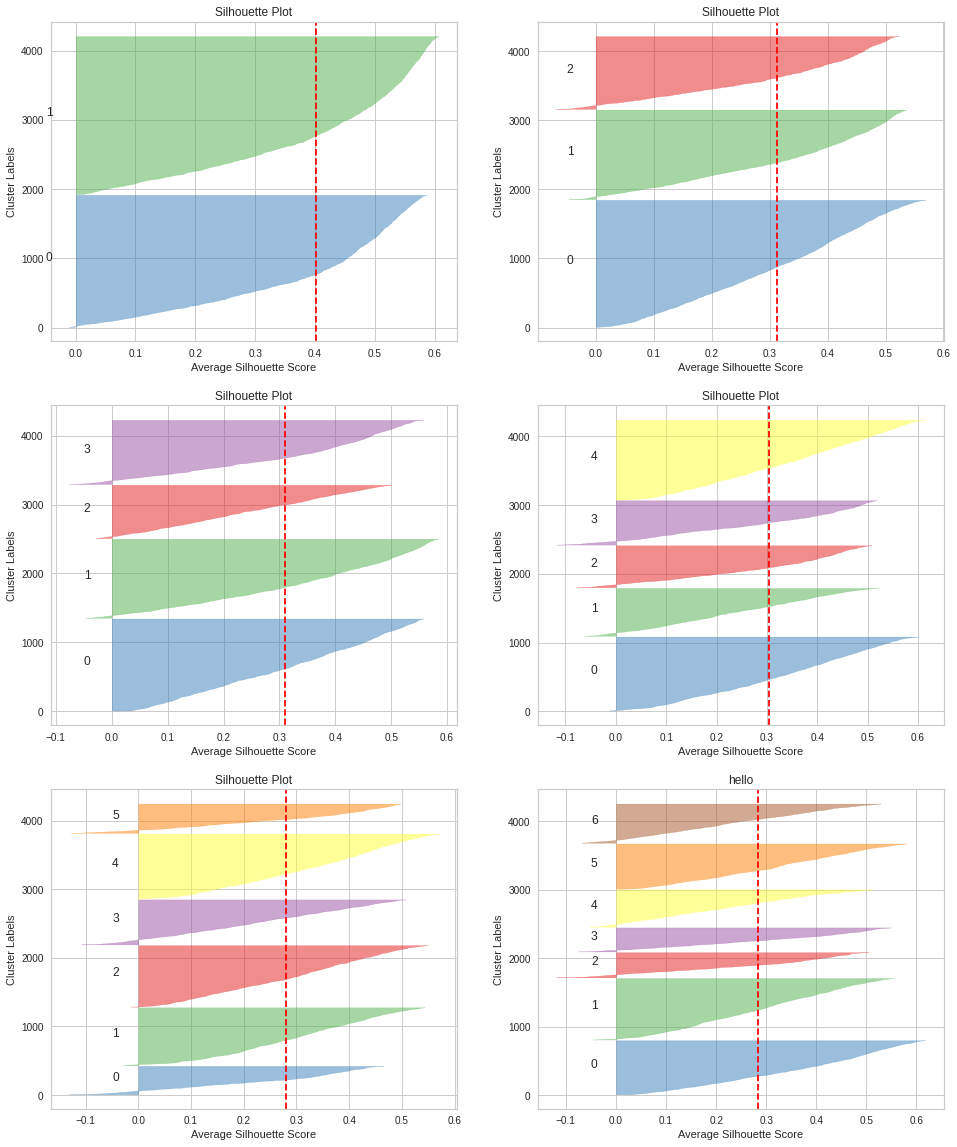

In [ ]:
# Silhouette Analysis
fig, ax = plt.subplots(3, 2, figsize=(16,20))

ax[0,0].set_title('Silhouette Plot'),ax[0,0].set_xlabel('Average Silhouette Score'),ax[0,0].set_ylabel('Cluster Labels')
ax[0,1].set_title('Silhouette Plot'),ax[0,1].set_xlabel('Average Silhouette Score'),ax[0,1].set_ylabel('Cluster Labels')
ax[1,0].set_title('Silhouette Plot'),ax[1,0].set_xlabel('Average Silhouette Score'),ax[1,0].set_ylabel('Cluster Labels')
ax[1,1].set_title('Silhouette Plot'),ax[1,1].set_xlabel('Average Silhouette Score'),ax[1,1].set_ylabel('Cluster Labels')
ax[2,0].set_title('Silhouette Plot'),ax[2,0].set_xlabel('Average Silhouette Score'),ax[2,0].set_ylabel('Cluster Labels')
ax[2,1].set_title('Silhouette Plot'),ax[2,1].set_xlabel('Average Silhouette Score'),ax[2,1].set_ylabel('Cluster Labels')


for i in [2, 3, 4, 5, 6, 7]:    
    '''
    Creating KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    q, mod = divmod(i, 2)
    '''
    Creating SilhouetteVisualizer instance with KMeans instance
    Fitting the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    

From these Silhouette Plot we can observe that average silhouette score is highest against the number of clusters 2.**Hence the optimal number of clusters is 2.**

### **Dendogram**
To find the optimal number of clusters for Hierarchical Clustering, we will plot Dendogram

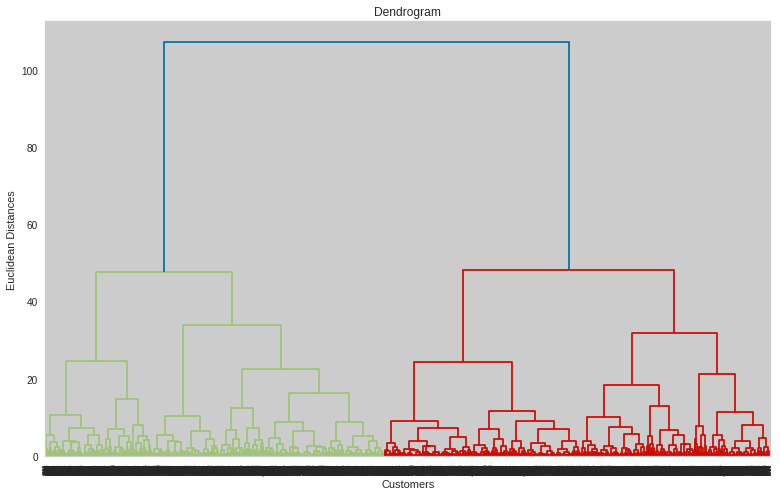

In [ ]:
# Plotting the dendogram to find the optimal number of clusters

plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 
# find largest vertical distance we can make without crossing any other horizontal line

The number of vertical lines which are being intersected by the line drawn using the threshold=90 represent the optimal number of clustera. **Hence optimal number of Clusters = 2.**

## <b> Step 6 : Model Implementation </b>

In [ ]:
# Implementing Clustering Algorithms to dataset
models = {
    KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000):                          " KMeans Clustering",
    AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward'): " Hierarchical  Clustering",
    DBSCAN(eps=0.5, min_samples=15):                                                   " DBSCAN",
    Birch(n_clusters=None,branching_factor = 50, threshold=1.5):                       " Birch",
  
}

# Fitting the models
for model in models.keys():
    model.fit(X)

## <b> Step 7 : Model Evaluation </b>

In [ ]:
# Calculating Silhouette Score
for model, name in models.items():
  print(f'Silhouette Score for {name} : {silhouette_score(X,model.labels_)}')

Silhouette Score for  KMeans Clustering : 0.4023784441068905
Silhouette Score for  Hierarchical  Clustering : 0.37243312676114976
Silhouette Score for  DBSCAN : 0.35882847053228323
Silhouette Score for  Birch : 0.40246472512972487


## <b> Step 8 : Model Selection </b>


*   The silhouette score is highest for birch and KMeans clustering model (0.4024 and 0.4023).

*   KMeans clustering do not perform very efficiently and it is difficult to process the large datasets with limited amount of resources.Hence for this dataset we selected birch model for clustering.



### **Visualizing the Clusters**

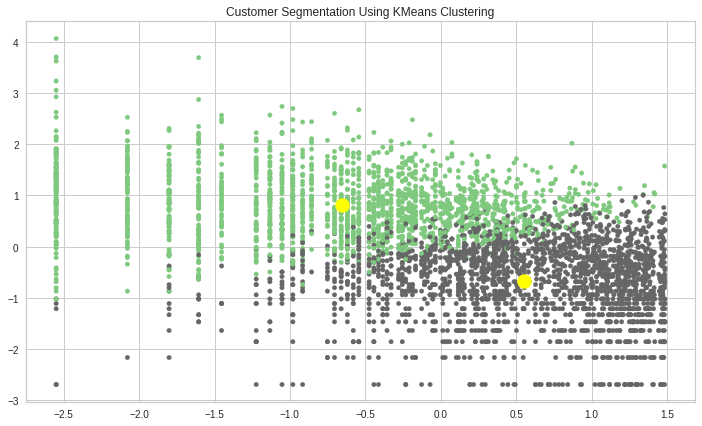

In [ ]:
# Visualizing the clusters for KMeans Model

km = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
km.fit(X)
y_km= km.predict(X)
plt.figure(figsize=(12,7))
plt.title('Customer Segmentation Using KMeans Clustering')
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=20, cmap='Accent')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=1)

Text(0.5, 1.0, 'Customer Segmentation Using Hierarchical Clustering')

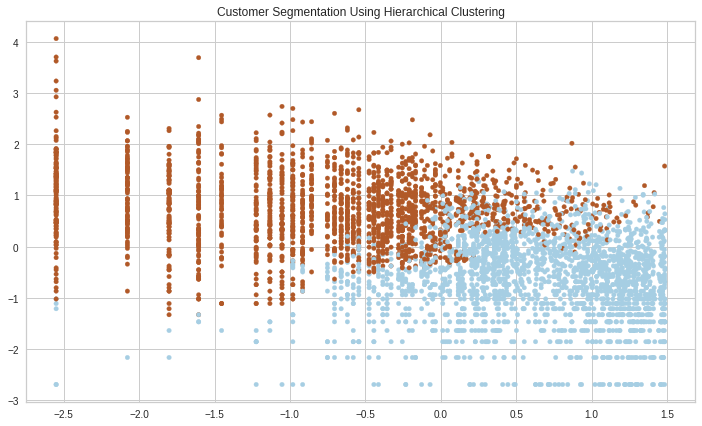

In [ ]:
# Visualizing the clusters for Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc.fit(X)
y_hc= hc.fit_predict(X)
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=20, cmap='Paired')
plt.title('Customer Segmentation Using Hierarchical Clustering')

###**DBDCAN Clustering**

Text(0.5, 1.0, 'Customer Segmentation Using DBSCAN Model')

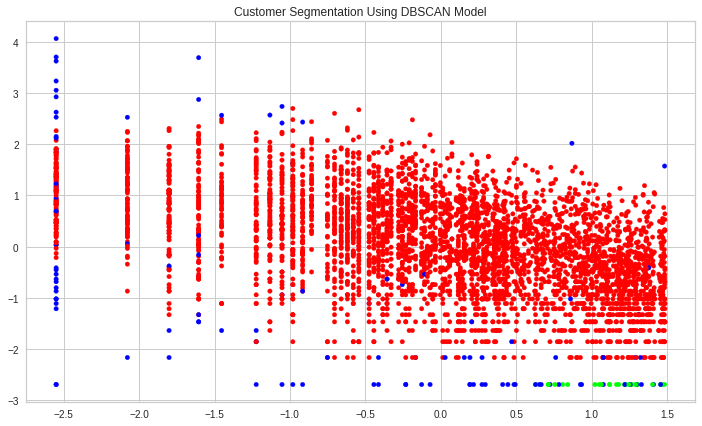

In [ ]:
# Visualizing the clusters for DBSCAN Clustering
db = DBSCAN(eps=0.5, min_samples=15)
db.fit(X)
y_db= db.fit_predict(X)
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1], c=y_db, s=20, cmap='brg')
plt.title('Customer Segmentation Using DBSCAN Model')

###**Birch Clustering**

Text(0.5, 1.0, 'Customer Segmentation Using Birch Clustering Model')

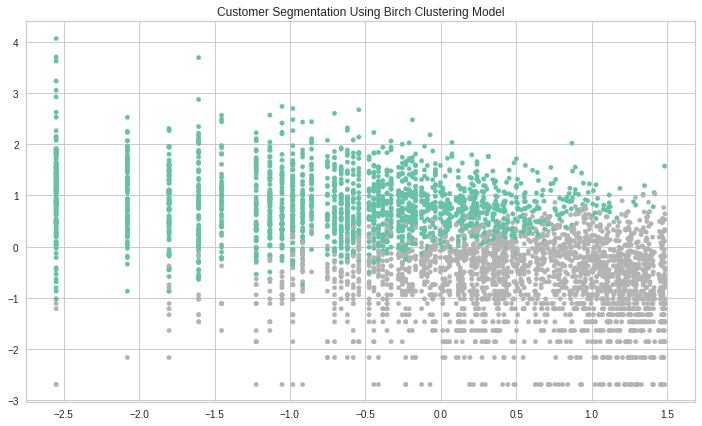

In [ ]:
# Visualizing the clusters for Birch Clustering Model
bc = Birch(branching_factor = 50, n_clusters=None, threshold=1.5)
bc.fit(X)
y_bc= bc.fit_predict(X)
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1], c=y_bc, s=20, cmap='Set2')
plt.title('Customer Segmentation Using Birch Clustering Model')

###**Summary of Results**

In [ ]:
# Specifying the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name","Optimal_Number_of_cluster","Silhouette Score"]) 
  
# Adding rows 
myTable.add_row(['1',"KMeans Clustering", "2", "0.4023"]) 
myTable.add_row(['2',"Hierarchical Clustering","2", "0.3724"])
myTable.add_row(['3',"DBSCAN ", "3", "0.3588"]) 
myTable.add_row(['4',"Birch", "2", "0.4024"])
print(myTable) 


+--------+-------------------------+---------------------------+------------------+
| SL No. |        Model_Name       | Optimal_Number_of_cluster | Silhouette Score |
+--------+-------------------------+---------------------------+------------------+
|   1    |    KMeans Clustering    |             2             |      0.4023      |
|   2    | Hierarchical Clustering |             2             |      0.3724      |
|   3    |         DBSCAN          |             3             |      0.3588      |
|   4    |          Birch          |             2             |      0.4024      |
+--------+-------------------------+---------------------------+------------------+


## <b> Conclusion </b>



*   In order to do the customer segmentation, we created RFM model and calculated RFM score.Higher RFM Score represents the most valuable customers of store.

*   The optimal number of clusters for KMeans Clustering using Elbow Method is 2.

*   We performed Silhouette Analysis and got the optimal number of clusters as 2.

*   The optimal number of clusters for Hierarchical Clustering using Dendograph is 2.

*   The Silhouette Score is highest for birch and KMeans Clustering (0.4024 and 0.4023).

*   For DBSCAN clustering, the Silhouette Score is 0.3588 with optimum number of clusters 3.

*   The hierarchical clustering model performed well but Silhoutte score was comparatively less.

*   KMeans clustering do not perform very efficiently and it is difficult to process the large datasets with limited amount of resources.Hence for this dataset we selected birch model for clustering.




## <b> References </b>
We have taken references for our project from below mentioned resources.

* AlmaBetter
* GitHub
* Kaggle
* YouTube
* StackOverFlow
* Towards data science
* Analytics vidya
* Code basics